This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?urlpath=lab/tree/notebooks/7_trees_randomforest_boosting/)

## RANDOM FOREST Classifiers


In [1]:
from sklearn  import tree
import numpy as np
from IPython.display import Image  
import pydotplus
%matplotlib inline
import matplotlib.pyplot as plt

**First, construct a tree based classifier, on IRIS data set (*), and evaluate the 'best' depth to use on a classification tree by cross-vaidation.**

(*) This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. 

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

see https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

### Question 
 As IRIS data file contians only 150 4-dimensional samples, assuming that we imposa that no less than 2 samples are contained in a leave, and that the training test is chosen to contain 100 samples, what is the possible maximal depth? 

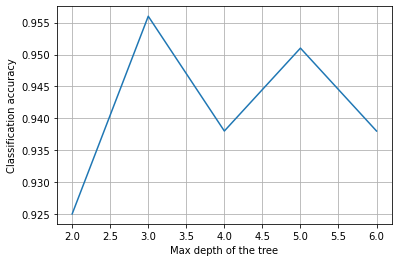

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import metrics

iris = load_iris()
depth_array = np.arange(2,7)
estd_accuracy = []

cv = ShuffleSplit(n_splits=20, test_size=0.33)

for nbdepth in depth_array:
    clf = tree.DecisionTreeClassifier(max_depth=nbdepth,criterion='gini',\
                                     min_samples_leaf=2)
    scores = cross_val_score(clf, iris.data, iris.target, cv=cv)
    estd_accuracy.append(scores.mean())

plt.plot(depth_array,estd_accuracy)
plt.xlabel("Max depth of the tree")
plt.ylabel("Classification accuracy")
plt.grid()

**Visualize the obtained tree for depth = 4** (this valuecanbe changed..)

In [3]:

nbdepth=4
clf = tree.DecisionTreeClassifier(max_depth=nbdepth,criterion='gini')
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, \
                                                    test_size=.33,random_state=None)
clf = clf.fit(X_train, y_train)

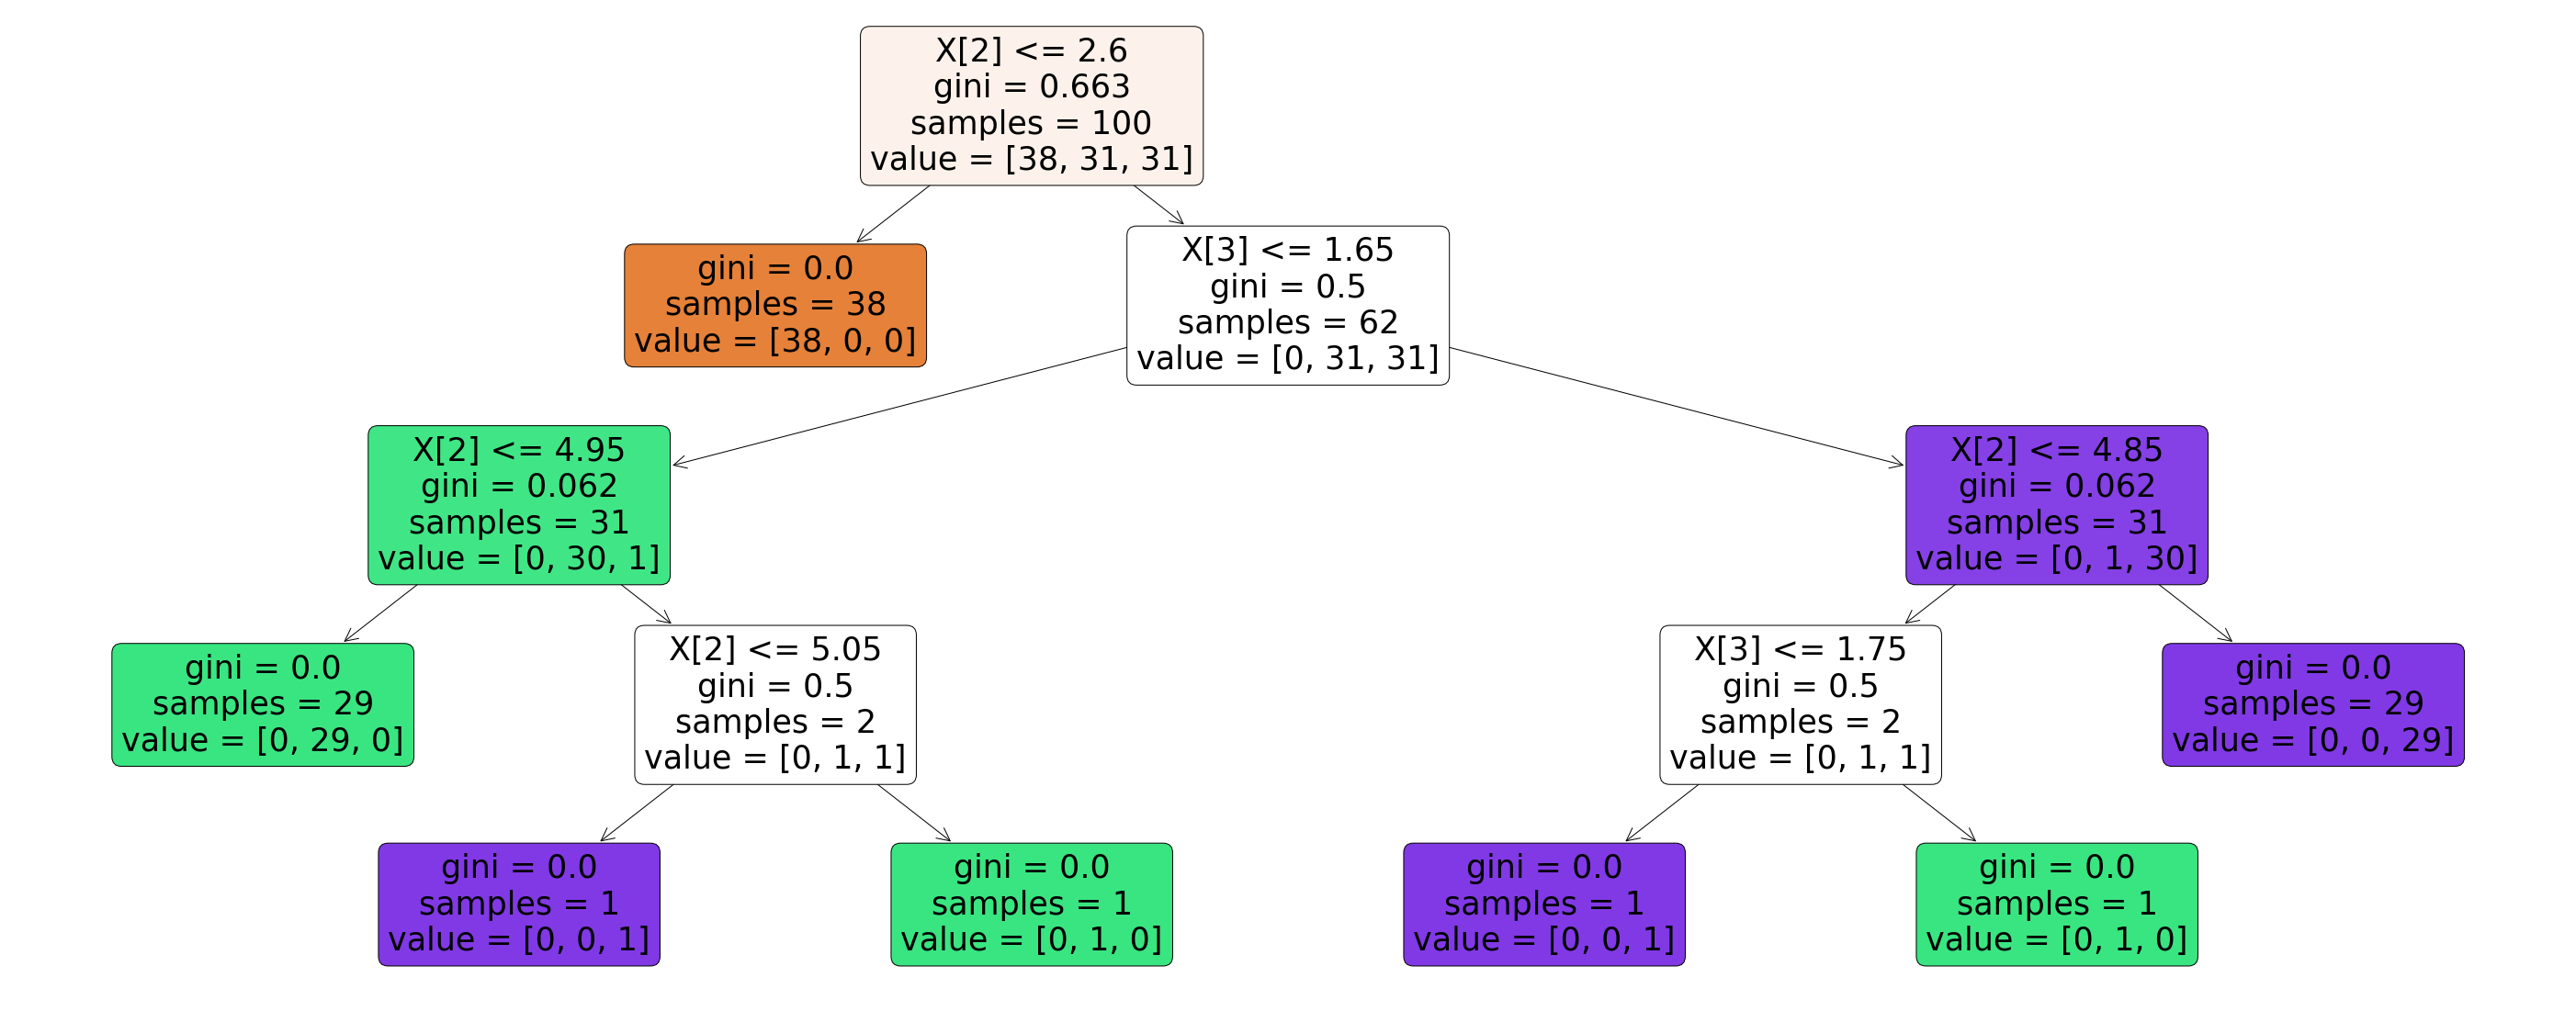

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,20))
a = plot_tree(clf, 
              filled=True, 
              rounded=True,fontsize=35)

## Exercize
- Compute the confusion matrix associated to this classifier. (Hint : see N1_Classif_tree.ipynb)
- Compute the mean accuracy of this tree classifier. (Hint : see N1_Classif_tree.ipynb)

### Random forest classifier computation

In [15]:
from sklearn.ensemble import RandomForestClassifier

mdepth_array=np.arange(1,7)
for mdepth in mdepth_array : 
    print('mdepth={}'.format(mdepth))
    clf = RandomForestClassifier(n_estimators=40, \
                             max_depth=mdepth, \
                             random_state=None, \
                             min_samples_split=2, 
                             criterion='gini')
    scores = cross_val_score(clf, iris.data, iris.target, cv=10)
    print("Mean Accuracy and 95 percent confidence interval: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2)) 

    

mdepth=1
Mean Accuracy and 95 percent confidence interval: 0.91 (+/- 0.21)
mdepth=2
Mean Accuracy and 95 percent confidence interval: 0.95 (+/- 0.09)
mdepth=3
Mean Accuracy and 95 percent confidence interval: 0.96 (+/- 0.09)
mdepth=4
Mean Accuracy and 95 percent confidence interval: 0.97 (+/- 0.07)
mdepth=5
Mean Accuracy and 95 percent confidence interval: 0.95 (+/- 0.10)
mdepth=6
Mean Accuracy and 95 percent confidence interval: 0.96 (+/- 0.09)


## Exercize 
- Change the value of parameter max_depth (ranging from 1 to 5) and record the obtained accuracy. Explain your findings. 
- Propose a method for setting the 'best' value of parameter n_estimator. 

## Study of feature importance
The purpose of this os to evaluate the importance of a given feature. This may be done by recording for all the trees involved in the forest, and all the nodes within each tree, the relevance of a feature : the contribution of each feature is increased each time it is used for splitting a node. This contribution correspond to the gain of impurity weighted by the relative number (wrt to the train set size) of samples in the splitted node. 

In [16]:
clf.fit(iris.data, iris.target)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
print(std)
indices = np.argsort(importances)[::-1]
indices


[0.1228137  0.05077528 0.32452641 0.30561254]


array([2, 3, 0, 1])

Feature ranking:
1. feature 2 (0.501634)
2. feature 3 (0.388246)
3. feature 0 (0.083257)
4. feature 1 (0.026863)


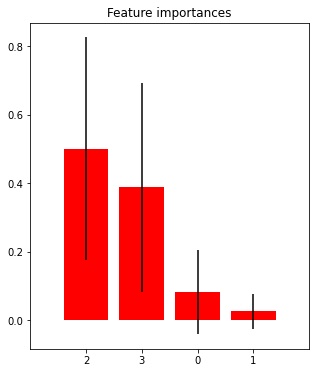

In [17]:

# Print the feature ranking
print("Feature ranking:")

for f in range(4):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    # Plot the feature importances of the forest
plt.figure(figsize=(5,6))
plt.title("Feature importances")
plt.bar(range(np.asarray(iris.data).shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks( range( np.asarray(iris.data).shape[1]) , indices)
plt.xlim([-1, np.asarray(iris.data).shape[1]])

plt.show()

## Exercize
Evaluate the feature importance in the IRIS Data Set , using ExtraTreesClassifier. 
- Compare with the results above. 
- What can be concluded about the features importance? 